# Práctica 5 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas

In [ ]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

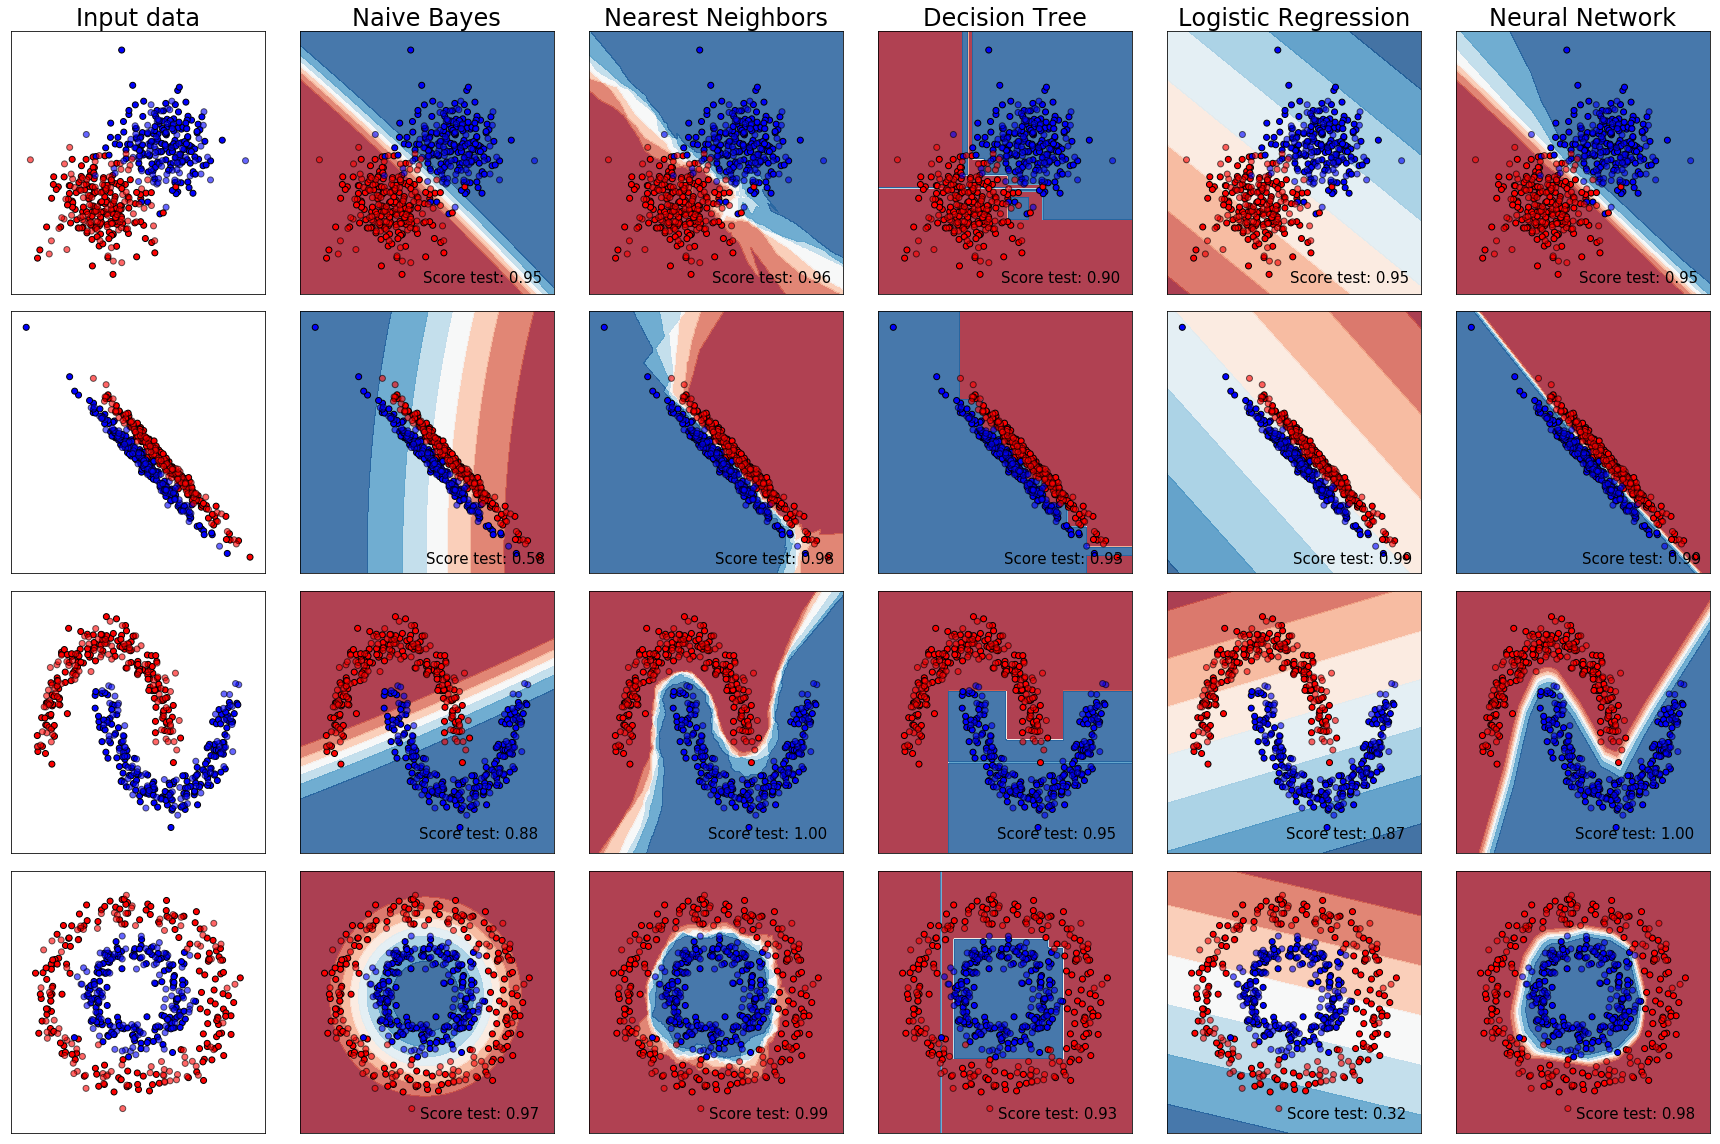

In [34]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=6)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=100)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(10,50,10,),
                              max_iter=1000,
                              alpha=0))]

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [5]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB(priors=None)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_it

**Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?
   
   Debe ser impar pues, como vecinos próximos se basa en el máximo número de clases próximas al dato que queremos clasificar, si tomamos un número par de vecinos próximos, puede pasar que la mitad de los vecinos pertenezcan a una clase y la otra mitad a la otra clase, de modo que no podemos saber a cuál de las dos clases pertenecería nuestro dato. En cambio, si el número de vecinos próximos que tomamos es impar, siempre va a haber más de una clase que de otra, siendo más exacta nuestra clasificación.
   
   
* Profundidad máxima de los árboles de decisión.

    Cuanta más profundidad pongamos, mejor será el resultado. Sin embargo, llega un punto en el que se alcanza un máximo y no sigue mejorando. Se puede observar que con una profundidad de 8, el resultado ya es mucho mejor que con 2.
    
    
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. ** Nota: ** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

    Se puede observar que aumentar el número de neuronas y aumentar el número de capas ocultas, varía muy poco los resultados. Los espacios sin clasificar en blanco se vuelven cada vez más pequeños. Pero la diferencia es tan pequeña con pocas capas que no merece la pena aumentarlas. Sin embargo, si bajamos el dato inicial sí se puede observar una gran diferencia a peor. Luego 50 neuronas es un buen dato.

# 2. Construcción de un clasificador en una base de datos real

In [35]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si una paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* ** Pregnancies: ** Number of times pregnant
* ** Glucose: ** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* ** BloodPressure: ** Diastolic blood pressure (mm Hg)
* ** SkinThickness: ** Triceps skin fold thickness (mm)
* ** Insulin: ** 2-Hour serum insulin (mu U/ml)
* ** BMI: ** Body mass index (weight in kg/(height in m)^2)
* ** DiabetesPedigreeFunction: ** Diabetes pedigree function
* ** Age: ** Age (years)
* ** Class: ** Class variable ("yes" / "no")

In [37]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [38]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

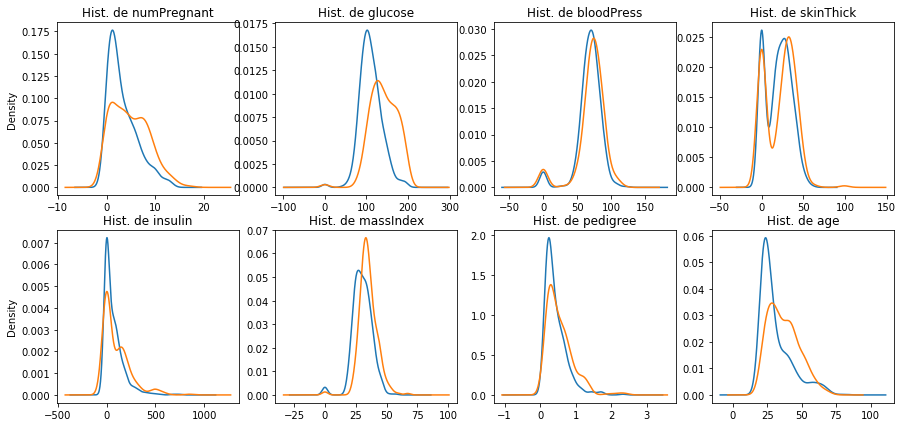

In [39]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux);

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [73]:
clf = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(clf, X, y, cv=5)
#print("scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.76 +/- 0.04


In [92]:
clf = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf, X, y, cv=5)
#print("scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.74 +/- 0.01


In [246]:
clf = MLPClassifier(hidden_layer_sizes=(75,75), max_iter=1000, alpha=0)
scores = cross_val_score(clf, X, y, cv=5)
#print("scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.67 +/- 0.02


## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?

    El mejor score que consigo es con 13 vecinos próximos pues sale 0.76 con un error de +/-0.04 de modo que como mucho alcanzaré 0.8 y como mínimo 0.72. Si seguimos aumentando el número de vecinos, el score empeora, sin embargo, entre 11, 13 y 15 vecinos próximos hay muy poca diferencia y a nivel estadístico no se notaría.
    
    
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?

    El mejor score es con una profundidad de 2 pues sale 0.74 con un error de 0.01. Si ponemos una profundidad de 5, también nos sale un score bueno y mejor, pero el error es mayor, luego 2 es mejor profundidad. A partir de una profundidad de 9 el score se mantiene variando únicamente el error.
    
    
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

    Tras probar varias opciones, la mejor opción es con 150 neuronas, sin embargo, con una sola capa obtengo un error de 0.05. Si reparto esas 150 neuronas en 2 capas de modo que cada una tenga 75 neuronas, el resultado se mantiene igual pero los errores, aunque sean aleatorios cada vez y puedan variar, son menores a con una sola capa, estando alrededor del 0.67 con un error de 0.02. Si reparto las 150 neuronas en 3 capas el resultado sería más o menos igual.

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

**Después de haber respondido aquí a estas preguntas, deberás subir este notebook a la tarea de Moodle.**